<a href="https://colab.research.google.com/github/Beatrix-Rix/Analyst-sentimen/blob/main/SouceCodeProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

!pip install scikit-learn

!pip install Sastrawi
!pip install tqdm
!pip install wordcloud


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,801 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,748 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-s

In [ ]:
import pandas as pd
import glob

csv_files = glob.glob('/content/tweets-data/*.csv')

df_list = [pd.read_csv(file) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)

df.to_csv('combined_csv.csv', index=False)
df = df[['full_text','created_at','username']]
df['created_at_formated'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S %z %Y', errors='coerce')
df_sorted = df.sort_values(by='created_at_formated', ascending=False)
df = df_sorted.head(2468)
display(df)

,full_text,created_at,username,created_at_formated
1446,Kementerian ATR/BPN telah menyerap anggaran me...,Tue Apr 29 23:56:34 +0000 2025,NaN,2025-04-29 23:56:34+00:00
1447,Selasa 29 April 2025 pukul 10.00 Wib. Babinsa ...,Tue Apr 29 23:25:35 +0000 2025,NaN,2025-04-29 23:25:35+00:00
1448,@pelatukangin @kompascom APBD Jawa Tengah tahu...,Tue Apr 29 17:40:32 +0000 2025,NaN,2025-04-29 17:40:32+00:00
1449,Pagu anggaran Kementerian Pertahanan (Kemenhan...,Tue Apr 29 16:18:00 +0000 2025,NaN,2025-04-29 16:18:00+00:00
1450,@uclemidiot @prabowo Pagu anggaran Kementerian...,Tue Apr 29 16:17:09 +0000 2025,NaN,2025-04-29 16:17:09+00:00
...,...,...,...,...
778,Pemangkasan anggaran tahun 2025 membuat Kemend...,Fri Feb 07 03:14:15 +0000 2025,KompasData,2025-02-07 03:14:15+00:00
779,Pemangkasan anggaran tahun 2025 membuat Kemend...,Fri Feb 07 03:14:14 +0000 2025,hariankompas,2025-02-07 03:14:14+00:00
780,Dandim 0703/Cilacap Lepas Pemberangkatan Peser...,Fri Feb 07 03:13:30 +0000 2025,penrem071_wk,2025-02-07 03:13:30+00:00
781,Kamis (6/2/2025) kemarin sebuah bale bengong d...,Fri Feb 07 03:06:41 +0000 2025,sonora_bali,2025-02-07 03:06:41+00:00


In [ ]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm.notebook import tqdm
tqdm.pandas()

slang_df = pd.read_csv("/content/slang.csv")
slang_dict = dict(zip(slang_df['slang'], slang_df['formal']))
factory = StemmerFactory()
stemmer = factory.create_stemmer()

indonesian_stopwords = [
    'yang', 'di', 'dan', 'dengan', 'untuk', 'pada', 'dari', 'ke', 'ini', 'itu', 'adalah',
    'sebagai', 'mereka', 'kami', 'saya', 'kamu', 'tersebut', 'bisa', 'tidak', 'sudah', 'belum',
    'atau', 'pun', 'oleh', 'dalam', 'lebih', 'sama', 'ada', 'ini', 'itu', 'anda', 'jika', 'maka',
    'juga', 'menggunakan', 'kami', 'terhadap', 'karena', 'sekarang', 'selama', 'seperti', 'saat',
    'pada', 'pernah', 'bahwa', 'akan', 'apakah', 'kepada', 'saat', 'oleh', 'juga', 'dengan',
    'saja', 'menjadi', 'setelah', 'dapat', 'kembali', 'tidak', 'sebelum', 'masih', 'apapun',
    'beberapa', 'melalui', 'hingga', 'seluruh', 'paling', 'mungkin', 'pertama', 'dimana', 'saat',
    'tersebut', 'bagi', 'sedang', 'kemudian', 'oleh', 'diantara', 'seperti', 'sudah', 'semua',
    'sesuai', 'tidak', 'akan', 'lebih', 'terhadap', 'terus', 'dari', 'mengenai', 'kita',
    'mendapatkan', 'mengapa', 'berikut', 'sekarang', 'selama', 'dengan', 'tetapi', 'jika', 'sehingga',
    'baru', 'bahkan', 'tapi', 'selain', 'pada', 'di', 'untuk', 'ada', 'sebelumnya', 'tahun', 'tanah', 'rp',
    'halo', 'lengkap', 'februari', 'triliun', 'sertipikat', 'sobatrbpn', 'telah', 'kabupaten', 'tanah',
    't', 'jadi',
]
stopword_csv = pd.read_csv("/content/stopword_indonesia.csv")
csv_stopwords = stopword_csv['stopword'].dropna().tolist()
# Membaca file stopword Bahasa Inggris
stopword_en = pd.read_csv("/content/stopword_inggris.csv")  # pastikan kolomnya bernama 'stopword'
csv_stopwords_en = stopword_en['stopword'].dropna().tolist()

# Gabungkan semua stopword (Indonesia + Inggris)
indonesian_stopwords = set(indonesian_stopwords + csv_stopwords + csv_stopwords_en)


def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = normalize_text(text)
    text = re.sub(r'[^A-Za-z]+', ' ', text)
    text = text.lower()
    words = text.split()
    words = [word for word in words if word not in indonesian_stopwords]
    words = [word for word in words if len(word) > 2]
    text = ' '.join(words)
    stemmed_text = stemmer.stem(text)

    return stemmed_text

def split_text(text):
    return text.split()

def normalize_text(text):
    words = text.split()
    normalized_words = [slang_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)
df = df.dropna(subset=['full_text'])
df = df.drop_duplicates(subset=['full_text'])

df['cleaned_text'] = df['full_text'].apply(preprocess_text)
df['preprocessed_text'] = df['cleaned_text'].apply(split_text)
df = df.drop_duplicates(subset=['preprocessed_text'])

display(df)

,full_text,created_at,username,created_at_formated,cleaned_text,preprocessed_text
1446,Kementerian ATR/BPN telah menyerap anggaran me...,Tue Apr 29 23:56:34 +0000 2025,NaN,2025-04-29 23:56:34+00:00,menteri atr bpn serap anggar capai hal sampai ...,"[menteri, atr, bpn, serap, anggar, capai, hal,..."
1447,Selasa 29 April 2025 pukul 10.00 Wib. Babinsa ...,Tue Apr 29 23:25:35 +0000 2025,NaN,2025-04-29 23:25:35+00:00,selasa april pukul wib babinsa desa plosorejo ...,"[selasa, april, pukul, wib, babinsa, desa, plo..."
1448,@pelatukangin @kompascom APBD Jawa Tengah tahu...,Tue Apr 29 17:40:32 +0000 2025,NaN,2025-04-29 17:40:32+00:00,apbd jawa tengah sekitar turut data resmi ppid...,"[apbd, jawa, tengah, sekitar, turut, data, res..."
1449,Pagu anggaran Kementerian Pertahanan (Kemenhan...,Tue Apr 29 16:18:00 +0000 2025,NaN,2025-04-29 16:18:00+00:00,pagu anggar menteri tahan kemenhan tni naik pa...,"[pagu, anggar, menteri, tahan, kemenhan, tni, ..."
1450,@uclemidiot @prabowo Pagu anggaran Kementerian...,Tue Apr 29 16:17:09 +0000 2025,NaN,2025-04-29 16:17:09+00:00,pagu anggar menteri tahan kemenhan tni naik pa...,"[pagu, anggar, menteri, tahan, kemenhan, tni, ..."
...,...,...,...,...,...,...
776,BRIN Efisiensi Anggaran Tahun 2025 Hingga Rp2 ...,Fri Feb 07 03:20:26 +0000 2025,romisaputra_3,2025-02-07 03:20:26+00:00,brin efisiensi anggar berita uang jakarta,"[brin, efisiensi, anggar, berita, uang, jakarta]"
777,Menteri Pekerjaan Umum Dody Hanggodo mengungka...,Fri Feb 07 03:15:04 +0000 2025,RadioElshinta,2025-02-07 03:15:04+00:00,menteri kerja umum dody hanggodo ungkap pihak ...,"[menteri, kerja, umum, dody, hanggodo, ungkap,..."
780,Dandim 0703/Cilacap Lepas Pemberangkatan Peser...,Fri Feb 07 03:13:30 +0000 2025,penrem071_wk,2025-02-07 03:13:30+00:00,dandim cilacap lepas berangkat serta seleksi c...,"[dandim, cilacap, lepas, berangkat, serta, sel..."
781,Kamis (6/2/2025) kemarin sebuah bale bengong d...,Fri Feb 07 03:06:41 +0000 2025,sonora_bali,2025-02-07 03:06:41+00:00,kamis kemarin buah bale bengong pancoran taman...,"[kamis, kemarin, buah, bale, bengong, pancoran..."


In [ ]:
df.to_csv("hasil_preprocessing.csv", index=False)


In [ ]:
# labeling sentiment
import csv

lexicon_positive = lexicon_negative = dict()
with open("/content/sample_data/positive.tsv","r") as csvfile:
  reader = csv.reader(csvfile, delimiter='\t')
  next(reader)
  for row in reader:
    lexicon_positive[row[0]] = int(row[1])

with open("/content/sample_data/negative.tsv","r") as csvfile:
  reader = csv.reader(csvfile, delimiter='\t')
  next(reader)
  for row in reader:
    lexicon_negative[row[0]] = int(row[1])


def get_sentiment_with_lexicon_indonesia(text):
  score = 0
  for word in text:
    if (word in lexicon_positive):
      score += lexicon_positive[word]
    elif (word in lexicon_negative):
      score += lexicon_negative[word]

  if (score > 0):
    polarity = 'positive'
  elif (score <= 0):
    polarity = 'negative'

  return score,polarity

results = df['preprocessed_text'].apply(get_sentiment_with_lexicon_indonesia)
results = list(zip(*results))

df['polarity_score'] = results[0]
df['polarity'] = results[1]

df = df[df['polarity_score'] != 0]
df['label_num'] = df['polarity'].map({'positive': 1, 'negative': 0})

df['preprocessed_text'].head()
display(df)

/tmp/ipython-input-5-440561381.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label_num'] = df['polarity'].map({'positive': 1, 'negative': 0})


,full_text,created_at,username,created_at_formated,cleaned_text,preprocessed_text,polarity_score,polarity,label_num
1446,Kementerian ATR/BPN telah menyerap anggaran me...,Tue Apr 29 23:56:34 +0000 2025,NaN,2025-04-29 23:56:34+00:00,menteri atr bpn serap anggar capai hal sampai ...,"[menteri, atr, bpn, serap, anggar, capai, hal,...",-7,negative,0
1447,Selasa 29 April 2025 pukul 10.00 Wib. Babinsa ...,Tue Apr 29 23:25:35 +0000 2025,NaN,2025-04-29 23:25:35+00:00,selasa april pukul wib babinsa desa plosorejo ...,"[selasa, april, pukul, wib, babinsa, desa, plo...",-11,negative,0
1449,Pagu anggaran Kementerian Pertahanan (Kemenhan...,Tue Apr 29 16:18:00 +0000 2025,NaN,2025-04-29 16:18:00+00:00,pagu anggar menteri tahan kemenhan tni naik pa...,"[pagu, anggar, menteri, tahan, kemenhan, tni, ...",-4,negative,0
1450,@uclemidiot @prabowo Pagu anggaran Kementerian...,Tue Apr 29 16:17:09 +0000 2025,NaN,2025-04-29 16:17:09+00:00,pagu anggar menteri tahan kemenhan tni naik pa...,"[pagu, anggar, menteri, tahan, kemenhan, tni, ...",1,positive,1
1451,BABINSA KORAMIL 07/PENYINGGAHAN HADIRI RAPAT P...,Tue Apr 29 15:36:34 +0000 2025,NaN,2025-04-29 15:36:34+00:00,babinsa koramil singgah hadir rapat tetap apbk...,"[babinsa, koramil, singgah, hadir, rapat, teta...",-4,negative,0
...,...,...,...,...,...,...,...,...,...
776,BRIN Efisiensi Anggaran Tahun 2025 Hingga Rp2 ...,Fri Feb 07 03:20:26 +0000 2025,romisaputra_3,2025-02-07 03:20:26+00:00,brin efisiensi anggar berita uang jakarta,"[brin, efisiensi, anggar, berita, uang, jakarta]",-1,negative,0
777,Menteri Pekerjaan Umum Dody Hanggodo mengungka...,Fri Feb 07 03:15:04 +0000 2025,RadioElshinta,2025-02-07 03:15:04+00:00,menteri kerja umum dody hanggodo ungkap pihak ...,"[menteri, kerja, umum, dody, hanggodo, ungkap,...",-7,negative,0
780,Dandim 0703/Cilacap Lepas Pemberangkatan Peser...,Fri Feb 07 03:13:30 +0000 2025,penrem071_wk,2025-02-07 03:13:30+00:00,dandim cilacap lepas berangkat serta seleksi c...,"[dandim, cilacap, lepas, berangkat, serta, sel...",-10,negative,0
781,Kamis (6/2/2025) kemarin sebuah bale bengong d...,Fri Feb 07 03:06:41 +0000 2025,sonora_bali,2025-02-07 03:06:41+00:00,kamis kemarin buah bale bengong pancoran taman...,"[kamis, kemarin, buah, bale, bengong, pancoran...",-6,negative,0


/tmp/ipython-input-6-4248562450.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette=colors)


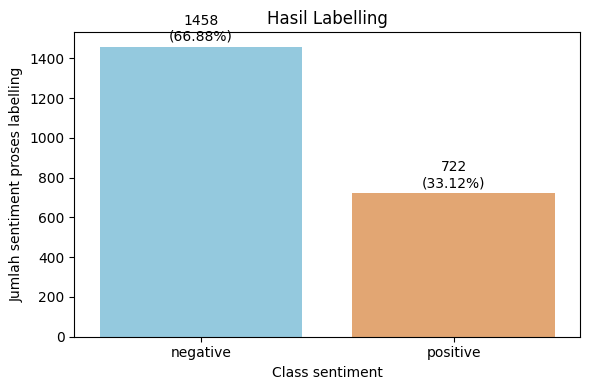

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah label
label_counts = df['polarity'].value_counts()
total = label_counts.sum()

# Warna untuk tiap label
colors = ['skyblue', 'sandybrown']

# Buat barplot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette=colors)

# Tambahkan angka dan persentase di atas bar
for i, v in enumerate(label_counts.values):
    percent = v / total * 100
    ax.text(i, v + 30, f"{v}\n({percent:.2f}%)", ha='center', fontsize=10)

# Judul dan label sumbu
plt.title("Hasil Labelling")
plt.xlabel("Class sentiment")
plt.ylabel("Jumlah sentiment proses labelling")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['cleaned_text'],   # Teks hasil cleaning
    df['label_num'],       # Label sentimen (0 = negatif, 1 = positif)
    test_size=0.2,         # 20% data untuk testing
    random_state=42,       # Agar hasil konsisten
    stratify=df['label_num']  # Menjaga proporsi label di train/test
)

print("Jumlah data training:", len(X_train_text))
print("Jumlah data testing :", len(X_test_text))


Jumlah data training: 1744
Jumlah data testing : 436


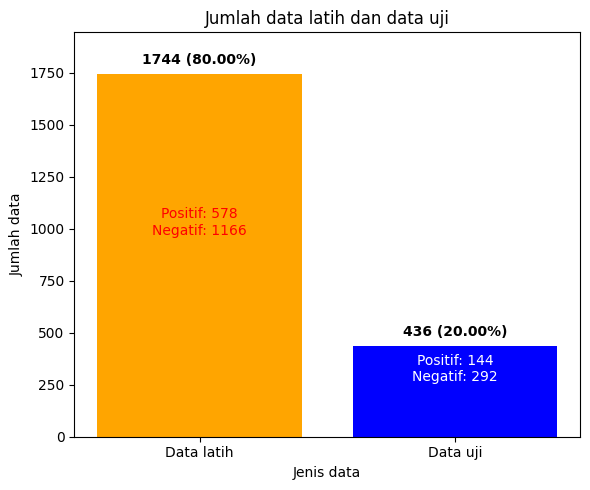

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah label positif dan negatif di data latih dan uji
train_pos = sum(y_train == 1)
train_neg = sum(y_train == 0)
test_pos = sum(y_test == 1)
test_neg = sum(y_test == 0)

# Nilai tinggi bar
bar_heights = [train_pos + train_neg, test_pos + test_neg]

# Plot bar
plt.figure(figsize=(6, 5))
bars = plt.bar(['Data latih', 'Data uji'], bar_heights, color=['orange', 'blue'])

# Tambahkan total dan presentase di atas bar
total = train_pos + train_neg + test_pos + test_neg
for i, v in enumerate(bar_heights):
    pct = v / total * 100
    plt.text(i, v + 50, f'{v} ({pct:.2f}%)', ha='center', fontsize=10, fontweight='bold')

# Tambahkan jumlah positif/negatif di dalam bar
plt.text(0, bar_heights[0] / 2 + 100, f'Positif: {train_pos}\nNegatif: {train_neg}', ha='center', color='red', fontsize=10)
plt.text(1, bar_heights[1] / 2 + 50, f'Positif: {test_pos}\nNegatif: {test_neg}', ha='center', color='white', fontsize=10)

# Label dan judul
plt.ylabel('Jumlah data')
plt.xlabel('Jenis data')
plt.title('Jumlah data latih dan data uji')

plt.ylim(0, max(bar_heights) + 200)
plt.tight_layout()
plt.show()


In [ ]:
#ini buat nyimpan data setnya

train_set = pd.DataFrame({
    'text': X_train_text,        # pakai teks hasil preprocessing (cleaned_t4ext)
    'sentiment': y_train         # label numerik (0/1)
})
train_set.to_csv('train_data.csv', index=False)
test_set = pd.DataFrame({
    'text': X_test_text,
    'sentiment': y_test
})
test_set.to_csv('test_data.csv', index=False)
all_dataset = pd.DataFrame({
    'text': df['cleaned_text'],   # semua teks hasil cleaning
    'sentiment': df['label_num']   # label numerik
})
all_dataset.to_csv('all_dataset.csv', index=False)


In [ ]:
#ini TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")

# TF-IDF fit di data train, transform keduanya
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(train_data['text'])
X_test_tfidf = vectorizer.transform(test_data['text'])

y_train = train_data['sentiment']
y_test = test_data['sentiment']


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

train_df = pd.read_csv('/content/train_data.csv')
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(train_df['text'])
from scipy.sparse import coo_matrix
tfidf_coo = coo_matrix(tfidf_matrix)
tfidf_triplet = pd.DataFrame({
    'X': tfidf_coo.row,
    'Y': tfidf_coo.col,
    'TF-IDF': tfidf_coo.data
})

print(tfidf_triplet)

          X     Y    TF-IDF
0         0  3784  0.115923
1         0  2929  0.262403
2         0   779  0.177980
3         0  2197  0.235498
4         0   188  0.037242
...     ...   ...       ...
30159  1743  3265  0.215765
30160  1743  2646  0.231844
30161  1743  2926  0.489211
30162  1743  1565  0.244606
30163  1743  5087  0.244606

[30164 rows x 3 columns]


In [ ]:
# Dapatkan nama fitur (kata-kata)
feature_names = vectorizer.get_feature_names_out()

# Ubah matrix menjadi array dan buat DataFrame
tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=feature_names)


In [ ]:
import numpy as np

avg_tfidf_scores = tfidf_df.mean(axis=0).sort_values(ascending=False)

top5 = avg_tfidf_scores.head(5).reset_index()
top5.columns = ['Kata', 'Rata-rata Skor TF-IDF']

print(top5)


        Kata  Rata-rata Skor TF-IDF
0     anggar               0.057240
1  efisiensi               0.040424
2    belanja               0.025887
3    menteri               0.025189
4    laksana               0.023023


In [ ]:
from sklearn.svm import SVC

# Buat model final dengan parameter terbaik
final_model = SVC(kernel='linear', C=10, class_weight='balanced')  # Ganti sesuai hasil GridSearchCV kamu
final_model.fit(X_train_tfidf, y_train)


SVC(C=10, class_weight='balanced', kernel='linear')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prediksi pada data uji
y_pred_final = final_model.predict(X_test_tfidf)

# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred_final))
print("Classification Report:")
print(classification_report(y_test, y_pred_final))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
print("Confusion Matrix:\n", cm)


Akurasi: 0.8348623853211009
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       292
           1       0.74      0.78      0.76       144

    accuracy                           0.83       436
   macro avg       0.81      0.82      0.82       436
weighted avg       0.84      0.83      0.84       436

Confusion Matrix:
 [[252  40]
 [ 32 112]]


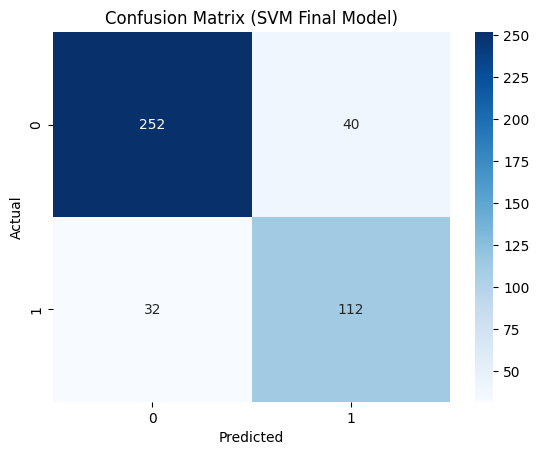

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (SVM Final Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import joblib
joblib.dump(final_model, 'final_svm_model.pkl')


['final_svm_model.pkl']

In [ ]:
all_texts_tfidf = vectorizer.transform(df['cleaned_text'])
all_preds = final_model.predict(all_texts_tfidf)
df['final_prediction'] = all_preds


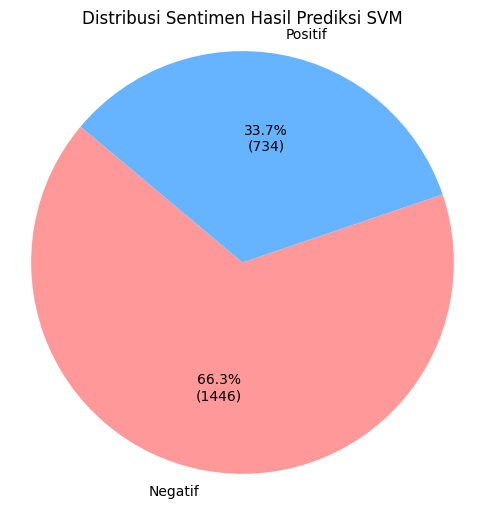

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Hitung jumlah tiap label
label_counts = df['final_prediction'].value_counts()
labels = ['Negatif', 'Positif']
sizes = [label_counts[0], label_counts[1]]  # 0: negatif, 1: positif
colors = ['#FF9999', '#66B3FF']

# Fungsi kustom untuk menampilkan persentase dan jumlah
def autopct_format(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct=lambda pct: autopct_format(pct, sizes),
    startangle=140,
    colors=colors
)
plt.title('Distribusi Sentimen Hasil Prediksi SVM')
plt.axis('equal')  # Pie chart sebagai lingkaran
plt.show()


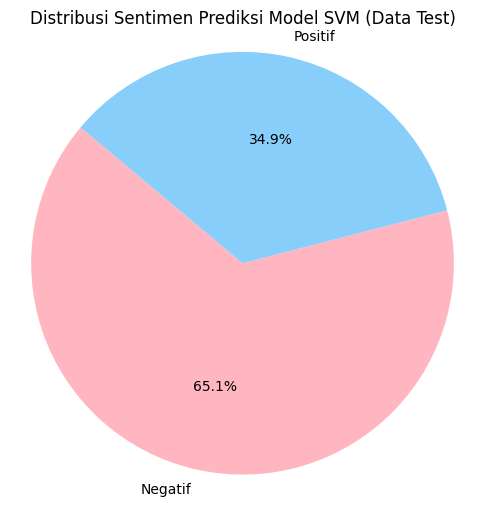

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Asumsikan final_model sudah dilatih (fit) dengan data train
# Dan X_test_tfidf sudah merupakan hasil TF-IDF dari data test

# 1. Lakukan prediksi terhadap data test
y_pred_test = final_model.predict(X_test_tfidf)

# 2. Buat dataframe hasil prediksi
df_test_pred = pd.DataFrame({
    'text': test_data['text'],
    'actual_sentiment': y_test,
    'predicted_sentiment': y_pred_test
})

# 3. Hitung jumlah prediksi positif dan negatif
label_counts = df_test_pred['predicted_sentiment'].value_counts()
labels = ['Negatif', 'Positif']
sizes = [label_counts[0], label_counts[1]]  # 0: Negatif, 1: Positif
colors = ['#FFB6C1', '#87CEFA']  # Warna pink dan biru

# 4. Tampilkan pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribusi Sentimen Prediksi Model SVM (Data Test)')
plt.axis('equal')  # Agar pie chart berbentuk lingkaran
plt.show()
